**Project:** Data Science Project - 10 Academy Week 0

## **Objective**
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset
*   Sentiment analysis on Twitter Datase

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### Twitter is the Major Source of data for week 0 challenge.
### The data are pre-downloaded data on china-usa related topics. The data comes in two parts. 



The first will be around 140mb of a raw twitter data dump in JSON format. This data is collected using the following keywords: [‘chinaus’, ‘chinaTaiwan’,  ‘chinaTaiwancrisis’, ‘taiwan’, ‘XiJinping’, ‘USCHINA’, ‘pelosi’, ‘TaiwanStraitsCrisis’, ‘WWIII’,  ‘pelosivisittotaiwan’],  


The second one will be around 130mb of the same format, but collected based on the original keyword plus country specific geocodes included e.g. ‘-28.479,26.128,400km  for South Africa.

















**Role**

#### Topic modelling
Discover abstract topics from tweets.

#### Sentiment analysis
1. Make sentiment analysis using the data.
2. Build a model and set up a deployment strategy that will trigger an alert when data drift is detected
3. Classify a tweet as a positive or negative tweet sentiment wise.




Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [7]:
main_objectives ='''Make topic modelling and sentiment analysis on tweetter data in order to build a model able to
detect urgent issues in real time before they spiral out of control.
'''


In [5]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [6]:
dm_outline = '''Data understanding, Data processing, Data Analysis/Modelling, Model Evaluation, Deployment
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
One of the main objective is to classify tweets as a positive or negative tweet sentiment wise.

Equations of the metrics:

Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [8]:
why_metrics = '''I chose this metric because of the model which will be ussing. 
In classification, we make prediction, 0 or 1. Then, the precision is the most suitable metricin this case.
'''

In [9]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''By assessing the fitted model using cross validation.
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [10]:
challenge_text = '''Dealing with new concepts
                    Understanding and coding the new concept
                    Being on time challenge
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import string
import os
import re
from textblob import TextBlob
from wordcloud import STOPWORDS,WordCloud
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv('cleaned_fintech_data.csv')
df = data.copy()

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

In [15]:
print("The number of missing value(s): {}".format(df.isnull().sum().sum()))

The number of missing value(s): 17941


In [16]:
print(df.columns)

Index(['Unnamed: 0', 'created_at', 'source', 'original_text', 'clean_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'screen_count', 'followers_count',
       'friends_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place', 'place_coord_boundaries', 'timestamp'],
      dtype='object')


In [17]:
print(df.shape)

(5621, 21)


(5621, 21)


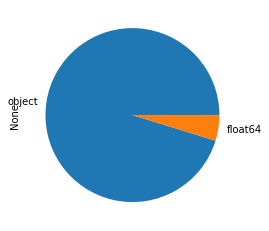

In [18]:
print(df.shape)
plt.figure()
df.dtypes.value_counts().plot.pie()
plt.savefig('data_type.png')


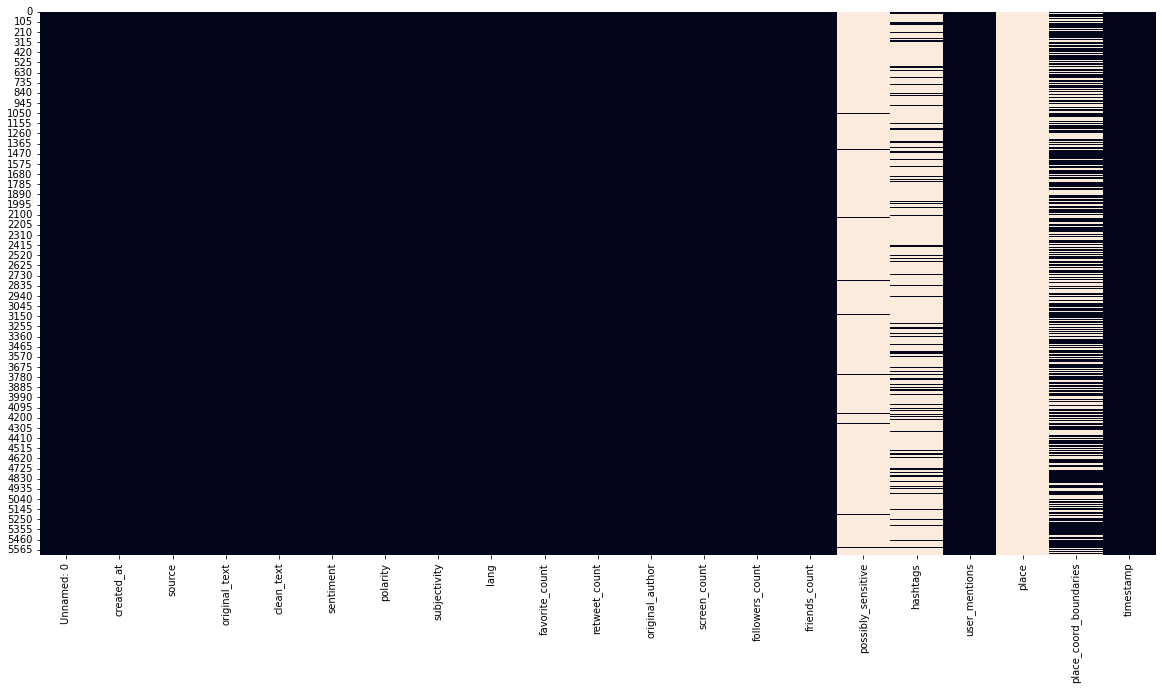

In [21]:
# Look at the missing values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)
plt.savefig('Missing_data.png')


In [22]:
# Percentage of missing data for variable with missing values
df_missing = df[['possibly_sensitive', 'hashtags', 'place', 'place_coord_boundaries']]

print((df_missing.isna().sum()/df.shape[0]).sort_values(ascending=False))


place                     0.999822
possibly_sensitive        0.976695
hashtags                  0.855364
place_coord_boundaries    0.359011
dtype: float64


In [23]:
# Data Preparation
place = df['place']
sensitivity = df['possibly_sensitive']
hashtags = df['hashtags']
place_coor = df['place_coord_boundaries']

# Drop the 4 columns with missing data
df = df.drop(['possibly_sensitive', 'hashtags', 'place', 'place_coord_boundaries'], axis = 1)

In [24]:
# Univarite anmlysis using language
# Tweets by language
tweets = pd.DataFrame(columns=['text','lang'])
tweets['text'] = df['clean_text'].to_list()
tweets['lang'] = df['lang'].to_list()
tweets_by_lang = tweets['lang'].value_counts()

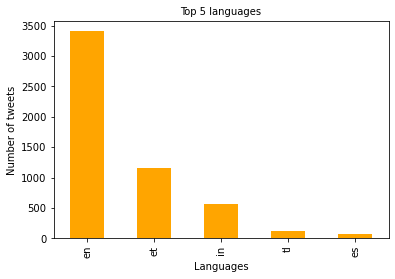

In [27]:
# Plotting tweets by language
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')
plt.savefig('tweets_by_lang.png')


In [43]:
## Visualisation for texts

# retain only english tweets
English_tweets = df.loc[df['lang'] =="en"]

#text Preprocessing
English_tweets['clean_text'] = English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


/tmp/ipykernel_11610/309861215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  English_tweets['clean_text'] = English_tweets['clean_text'].astype(str)
/tmp/ipykernel_11610/309861215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
/tmp/ipykernel_11610/309861215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

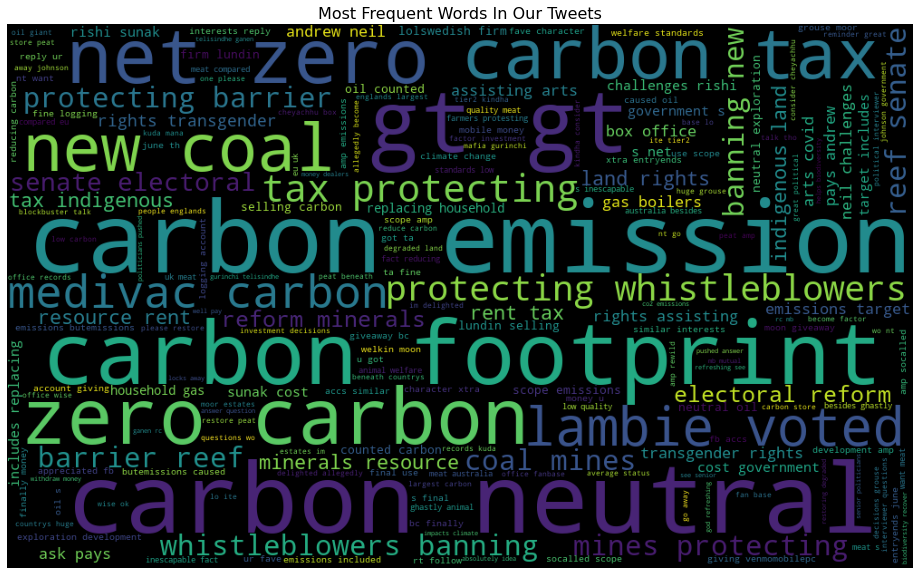

In [44]:
# Plot
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000, height=600, stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.savefig('Wordcloud_text.png')


### Form a new data frame (named cleanTweet), containing columns  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲 .

In [33]:
cleanTweet = pd.DataFrame(columns=['text','polarity'])
cleanTweet['text'] = df['clean_text'].to_list()
cleanTweet['polarity'] = df['polarity'].to_list()


### Write a function text_category that takes a value p and returns, depending on the value of p, a string 'positive', 'negative' or 'neutral'


In [34]:
def text_category(p):
    if p < 0:
        category = 'negative'
    elif p == 0:
        category = 'neutral'
    else:
        category = 'positive'
    return category

### Apply this function (text_category) on the polarity column of cleanTweet in 1 above to form a new column called scores  in cleanTweet

In [45]:
polarities = [TextBlob(t).sentiment.polarity for t in df['original_text'].to_list()]

scores = [text_category(p) for p in polarities]

cleanTweet['scores'] = scores


### Visualize The  𝐬𝐜𝐨𝐫𝐞  column using piechart and barchar

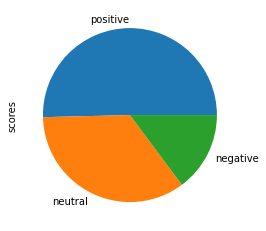

In [46]:
plt.figure()
cleanTweet['scores'].value_counts().plot.pie()
plt.savefig('scores_plot1.png')


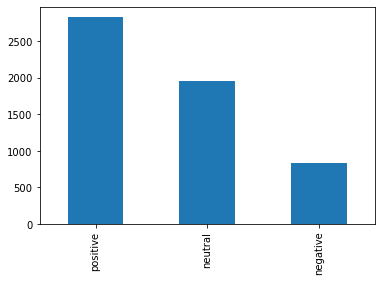

In [47]:
plt.figure()
cleanTweet['scores'].value_counts().plot(kind='bar')
plt.savefig('scores_plot2.png')


### Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.


In [58]:
print(cleanTweet.columns)

Index(['text', 'polarity', 'scores'], dtype='object')


In [59]:
print(cleanTweet.shape)

(5621, 3)


In [60]:
print(cleanTweet[cleanTweet['scores'] == 'neutral']["scores"].value_counts())

neutral    1957
Name: scores, dtype: int64


In [62]:
cleanTweet = cleanTweet[cleanTweet['scores'] != 'neutral']
print(cleanTweet.shape)

(3664, 3)


### Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column

In [67]:
scoremap = {'positive':1, 'negative':0} 
cleanTweet['scoremap'] = cleanTweet['scores'].map(scoremap)

/tmp/ipykernel_11610/356792756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['scoremap'] = cleanTweet['scores'].map(scoremap)


In [68]:
print(cleanTweet)

                                                   text             polarity  \
0     Giving forth life becoming burden Kenya This m...   0.3194444444444445   
3     Today World Day Combat Restoring degraded land...                 0.25   
4     Hearing say 's confident vaccines delivered li...                  0.5   
6     Today World Day Combat Restoring degraded land...                 0.25   
8     Deployment low carbon technologies need taken ...                  0.0   
...                                                 ...                  ...   
5615  In latest episode podcast Unilevers Peter Ter ...   0.2791666666666667   
5616  Lambie voted AGAINST Medivac Carbon tax protec...  0.13636363636363635   
5617  Idhi bathuku Most Day1 Records In Nizam Non BB...                  0.5   
5618  welkin moon giveaway bc finally money -u got t...  0.15416666666666667   
5620  This first time I 've seen Government media le...                 0.13   

        scores  scoremap  
0     positi

### Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.

In [71]:
X = cleanTweet['text']
y = cleanTweet['scoremap']

print(X)
print(y)

0       Giving forth life becoming burden Kenya This m...
3       Today World Day Combat Restoring degraded land...
4       Hearing say 's confident vaccines delivered li...
6       Today World Day Combat Restoring degraded land...
8       Deployment low carbon technologies need taken ...
                              ...                        
5615    In latest episode podcast Unilevers Peter Ter ...
5616    Lambie voted AGAINST Medivac Carbon tax protec...
5617    Idhi bathuku Most Day1 Records In Nizam Non BB...
5618    welkin moon giveaway bc finally money -u got t...
5620    This first time I 've seen Government media le...
Name: text, Length: 3664, dtype: object
0       1
3       1
4       1
6       1
8       1
       ..
5615    1
5616    1
5617    0
5618    0
5620    1
Name: scoremap, Length: 3664, dtype: int64


### Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)

### Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.

### Evaluate your model on the test data.